In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bird_dino_data.csv")

In [3]:
df.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3)
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08


In [4]:
#create whole brain column to data set
df["Whole Brain"] = df["Olfactory bulbs (cm3)"] + df["Cerebrum (cm3)"] + df["Optic Lobes (cm3)"] + df["Cerebellum (cm3)"] + df["Brain Stem (cm3)"] 
df.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.959
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.036
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.096
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.830
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.193


In [5]:
#add column cerebrum to whole brain ratio
df["Cerebrum to Whole"] = df["Cerebrum (cm3)"]/df["Whole Brain"]
df.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain,Cerebrum to Whole
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.959,0.781011
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.036,0.762843
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.096,0.733969
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.830,0.493976
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.193,0.715914


In [6]:
#brain to body mass ratio
#multiply body mass by 1000 to convert to grams to compare to cm3 of brain
df["Brain to Body Mass"] = df["Whole Brain"]/(df["Body Mass (kg)"]*1000)
df.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain,Cerebrum to Whole,Brain to Body Mass
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.959,0.781011,0.097950
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.036,0.762843,0.017489
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.096,0.733969,0.006925
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.830,0.493976,0.003320
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.193,0.715914,0.219300


In [7]:
#volume vs. weight / cm^3 = g

In [8]:
#average of bird vs. dinosaur
CWB = df["Cerebrum to Whole"].loc[df["Bird vs Dino"] == "B"]
avgCWB= CWB.mean()
print(avgCWB)

0.6650761062786563


In [9]:
BBB = df["Brain to Body Mass"].loc[df["Bird vs Dino"] == "B"]
avgBBB = BBB.mean()
print(avgBBB)

0.04781897158703077


In [10]:
CWD = df["Cerebrum to Whole"].loc[df["Bird vs Dino"] == "D"]
avgCWD = CWD.mean()
print(avgCWD)

0.4696031703064059


In [11]:
BBD = df["Brain to Body Mass"].loc[df["Bird vs Dino"] == "D"]
avgBBD = BBD.mean()
print(avgBBD)

0.0016099413841087278


In [12]:
#function takes in femur in mm and returns body mass in kg
def bodymass(dinotype, femur):
    if dinotype == "ornithischian":
        return 10**(3.0587*np.log10(femur)-2.7042)/1000
    elif dinotype == "sauropd":
        return 10**(2.3459*np.log10(femur)-0.2935)/1000
    elif dinotype == "theropod":
        return 10**(3.1854*np.log10(femur)-3.184)/1000

In [13]:
your_brainBM = bodymass("theropod",7)
print(your_brainBM)

0.0003220885577143592


In [14]:
olf = 0.05
cere = 0.275 
opt = 0.25
cereb = 0.225

In [24]:
def info(femur,vol,cere,olf,opt,cereb):
    bm_kg = bodymass("theropod",femur)
    your_BB = vol/bm_kg*1000
    your_whole = olf + cere + opt + cereb
    your_CW = cere/your_whole
    if abs(your_BB - avgBBB)>abs(your_BB - avgBBD):
        bm_ans =  "Dino"
    elif abs(your_BB - avgBBB)<abs(your_BB - avgBBD):
        bm_ans =  "Bird"
        
    if abs(your_CW - avgCWD)>abs(your_CW - avgCWB):
        cw_ans =  "Bird"
    elif abs(your_CW - avgCWD)<abs(your_CW - avgCWB):
        cw_ans =  "Dino"
    return [bm_ans,cw_ans]

In [25]:
info(7,1.4,0.275,0.05,0.25,0.225)

['Bird', 'Dino']

In [26]:
#create a function with femur length, brain volume,cerebrum width, whole brain width
#return: birds or dinosaur brain

In [27]:
#Body Mass Bird and Dino
BMB = df["Body Mass (kg)"].loc[df["Bird vs Dino"] == "B"]
BMD = df["Body Mass (kg)"].loc[df["Bird vs Dino"] == "D"]

In [35]:
#Brain Mass Bird and Dino
BRB = df["Whole Brain"].loc[df["Bird vs Dino"] == "B"]
BRD = df["Whole Brain"].loc[df["Bird vs Dino"] == "D"]
my_whole = olf + cere + opt + cereb
my_bm = bodymass("theropod",7)

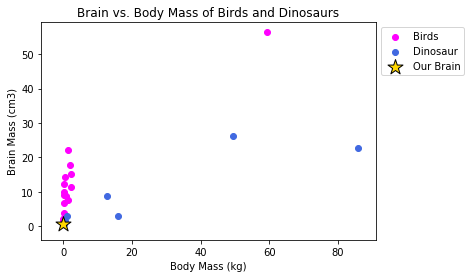

<Figure size 432x288 with 0 Axes>

In [89]:
import matplotlib.colors as mpl # We'll use the matplotlib.colors library to color our data points
%matplotlib inline

#body mass x axis
#brain mass y axis
#bird info one scatter plot
#brain info one scater
#our brain scatter plot
plt.scatter(BMB,BRB, color = "magenta",label = "Birds")
plt.scatter(BMD,BRD, color = "royalblue", label = "Dinosaur")
plt.scatter(my_bm,my_whole, marker = "*", s = 250, color = "gold", edgecolor = "black", label = "Our Brain")
plt.xlabel("Body Mass (kg)")
plt.ylabel("Brain Mass (cm3)")
plt.title("Brain vs. Body Mass of Birds and Dinosaurs")
plt.legend(bbox_to_anchor =[1.28, 1.0])
plt.show()
plt.savefig("Brain vs. Body Mass of Birds and Dinosaurs.png")
